## Training YOLOv5 on Custom Dataset

This tutorial is based on the [YOLOv5 repository](https://github.com/ultralytics/yolov5) by [Ultralytics](https://www.ultralytics.com/). This notebook shows training on **your own custom objects**. Many thanks to Ultralytics for putting this repository together - we hope that in combination with clean data management tools at Roboflow, this technologoy will become easily accessible to any developer wishing to use computer vision in their projects.

### Accompanying Blog Post

We recommend that you follow along in this notebook while reading the blog post on [how to train YOLOv5](https://blog.roboflow.ai/how-to-train-yolov5-on-a-custom-dataset/), concurrently.

### Steps Covered in this Tutorial

In this tutorial, we will walk through the steps required to train YOLOv5 on your custom objects. We use a [public blood cell detection dataset](https://public.roboflow.ai/object-detection/bccd), which is open source and free to use. You can also use this notebook on your own data.

To train our detector we take the following steps:

* Install YOLOv5 dependencies
* Download custom YOLOv5 object detection data
* Write our YOLOv5 Training configuration
* Run YOLOv5 training
* Evaluate YOLOv5 performance
* Visualize YOLOv5 training data
* Run YOLOv5 inference on test images
* Export saved YOLOv5 weights for future inference

Let's get started!

# Install Dependencies

_(Remember to choose GPU in Runtime if not already selected. Runtime --> Change Runtime Type --> Hardware accelerator --> GPU)_

In [1]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt

Cloning into 'yolov5'...


remote: Enumerating objects: 16413, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 16413 (delta 0), reused 3 (delta 0), pack-reused 16408
Receiving objects: 100% (16413/16413), 14.90 MiB | 3.95 MiB/s, done.
Resolving deltas: 100% (11265/11265), done.
/home/rpi/hooper/cv/yolov5


/home/rpi/hooper/env/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 323.1 kB/s eta 0:00:0000:0100:01
  Using cached matplotlib-3.8.3-cp311-cp311-manylinux_2_17_aarch64.manylinux2014_aarch64.whl (11.4 MB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_aarch64.manylinux2014_aarch64.whl (14.2 MB)
  Using cached opencv_python-4.9.0.80-cp37-abi3-manylinux_2_17_aarch64.manylinux2014_aarch64.whl (41.3 MB)
  Using cached pillow-10.2.0-cp311-cp311-manylinux_2_28_aarch64.whl (4.3 MB)
  Using cached PyYAML-6.0.1-cp311-cp311-manylinux_2_17_aarch64.manylinux2014_aarch64.whl (732 kB)
  Using cached https://www.piwheels.org/simple/requests/requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached scipy-1.12.0-cp311-cp311-manylinux_2_17_aarch64.manylinux2014_aarch64.whl (34.7 MB)
  Using cached thop-0.1.1.post2209072238-py3-none-any.whl (15 kB)
Note: you may need to restart the kernel to use updated packages.


# Download a Dataset

Add your Roboflow API key below to download the default money counting dataset. Alternatively, use the code provided by the Roboflow dashboard in the above step to load a custom dataset.

In [3]:
%cd yolov5/

/home/invigilo/evan/hooper/cv/yolov5


using dhist requires you to install the `pickleshare` library.


In [1]:
%pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="rz0A8V6lWKzJHGDrFe89")
project = rf.workspace("healthhack").project("hop-tiny")
dataset = project.version(4).download("yolov5")

Note: you may need to restart the kernel to use updated packages.
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to hop-tiny-4 in yolov5pytorch:: 100%|██████████| 190/190 [00:00<00:00, 7458.29it/s]


# Train Custom YOLOv5 Detector

### Next, we'll fire off training!


Here, we are able to pass a number of arguments:
- **img:** define input image size
- **batch:** determine batch size
- **epochs:** define the number of training epochs. (Note: often, 3000+ are common here!)
- **data:** set the path to our yaml file
- **cfg:** specify our model configuration
- **weights:** specify a custom path to weights. (Note: you can download weights from the Ultralytics Google Drive [folder](https://drive.google.com/open?id=1Drs_Aiu7xx6S-ix95f9kNsA6ueKRpN2J))
- **name:** result names
- **nosave:** only save the final checkpoint
- **cache:** cache images for faster training

In [19]:
%cd yolov5/
!python train.py --batch 16 --epochs 600 --img 640 --data hop-tiny-4/data.yaml --weights 'yolov5s.pt' --cache

[Errno 2] No such file or directory: 'yolov5/'
/home/invigilo/evan/hooper/cv/yolov5


using bookmarks requires you to install the `pickleshare` library.


train: weights=yolov5s.pt, cfg=, data=hop-tiny-4/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=600, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-284-g95ebf68f Python-3.10.12 torch-2.2.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3060, 12039MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, c

# Evaluation

You can view the training graphs associated with a training job in the `/content/yolov5/runs/train/exp/results.png` folder.

Training losses and performance metrics are also saved to Tensorboard.

In [20]:
# Set the exp number
exp = 'exp12'

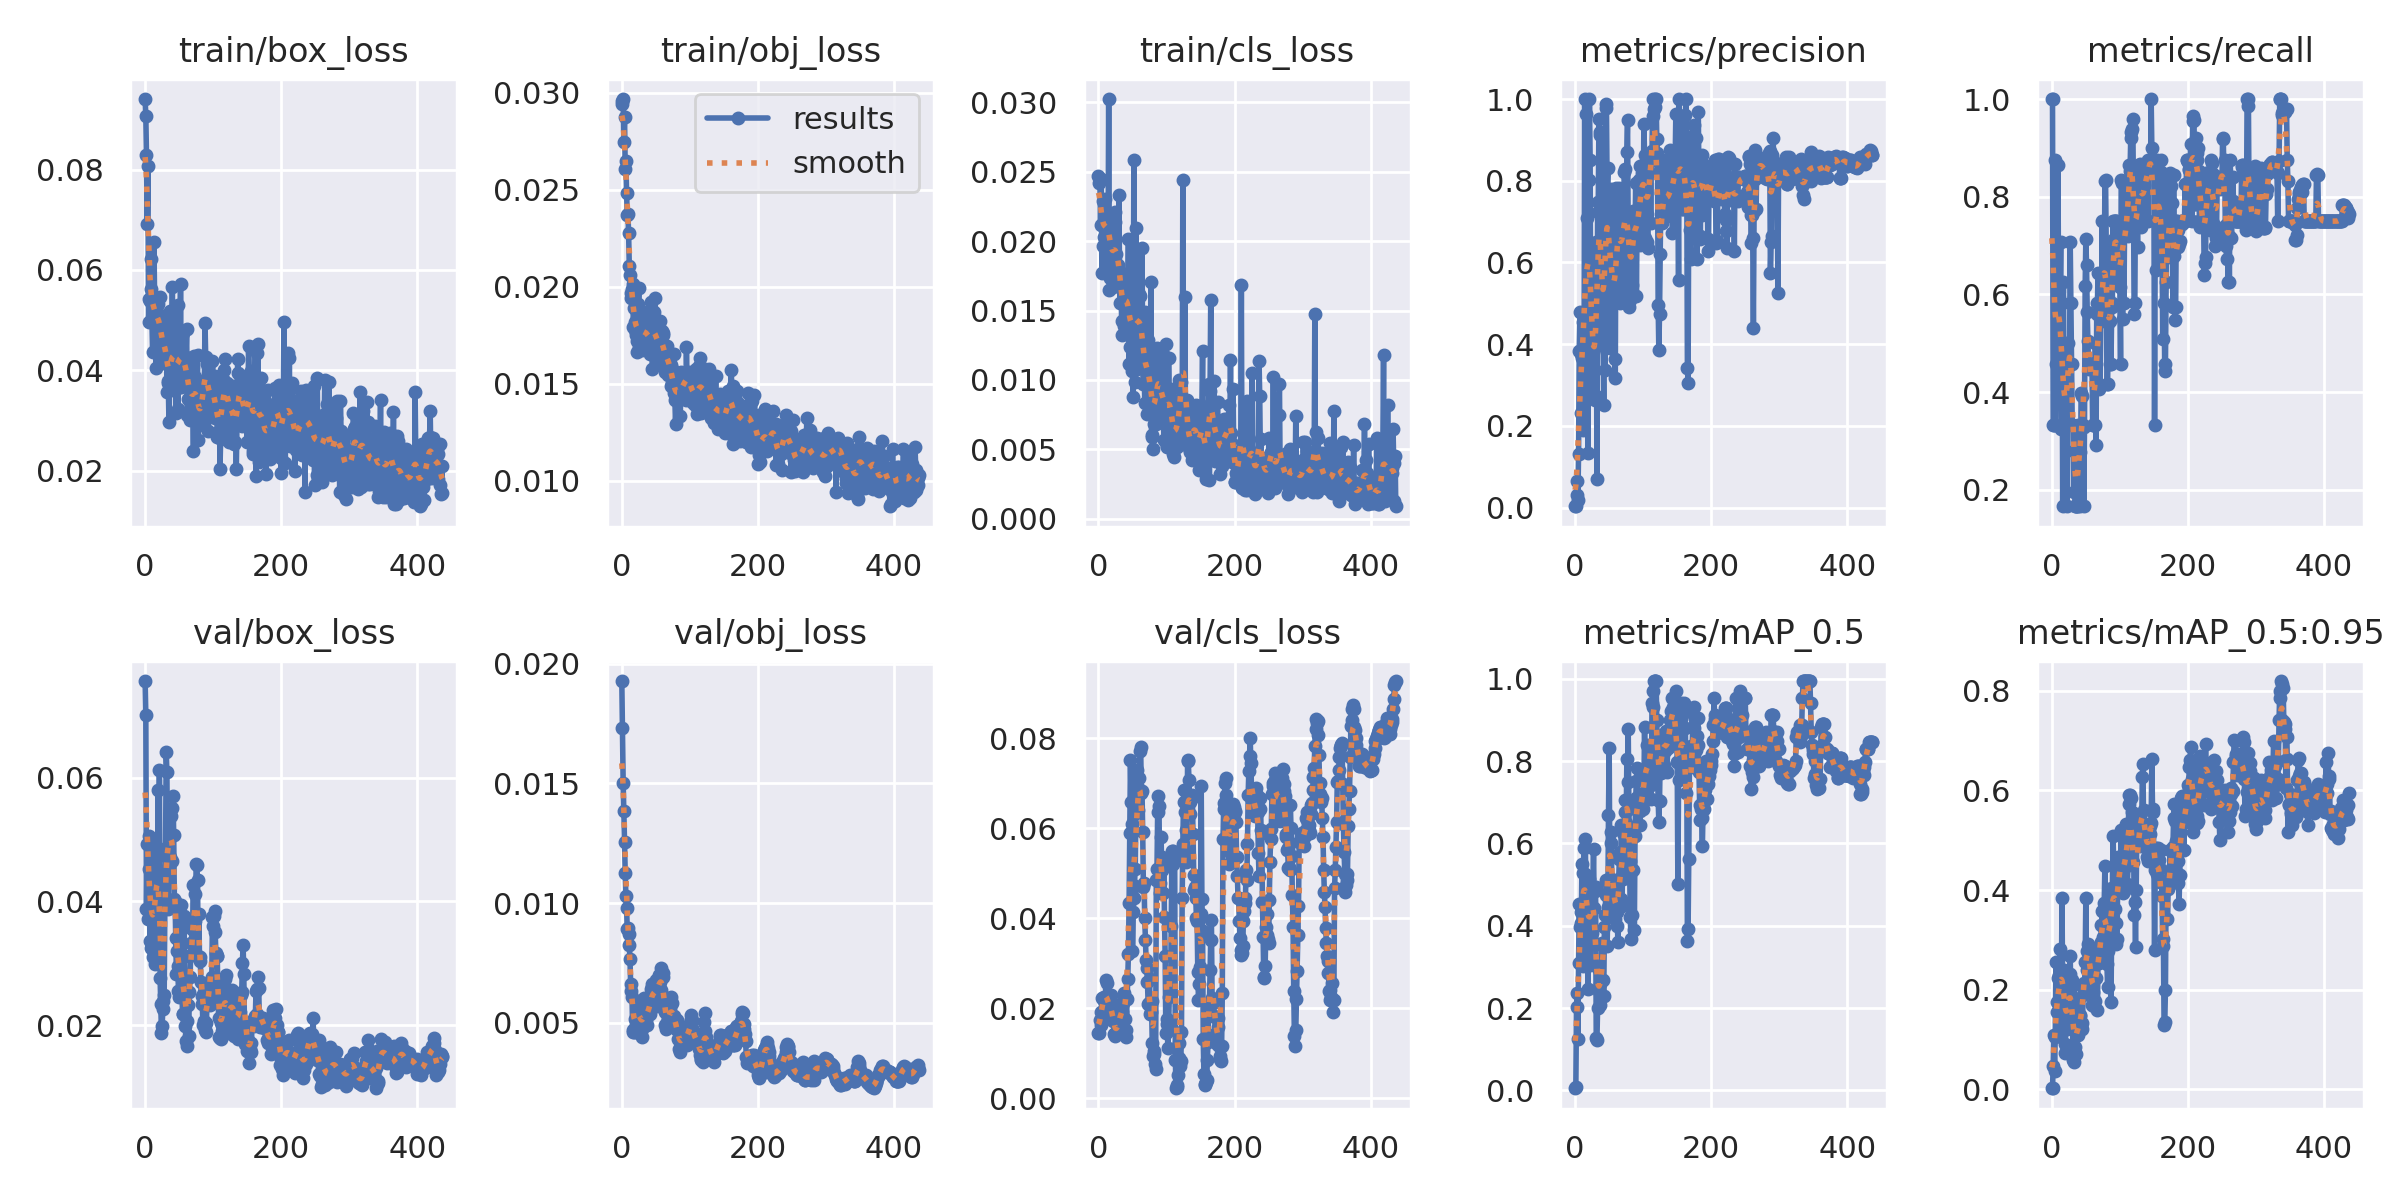

In [21]:
from IPython.display import Image
Image(f'runs/train/{exp}/results.png', width=1000)

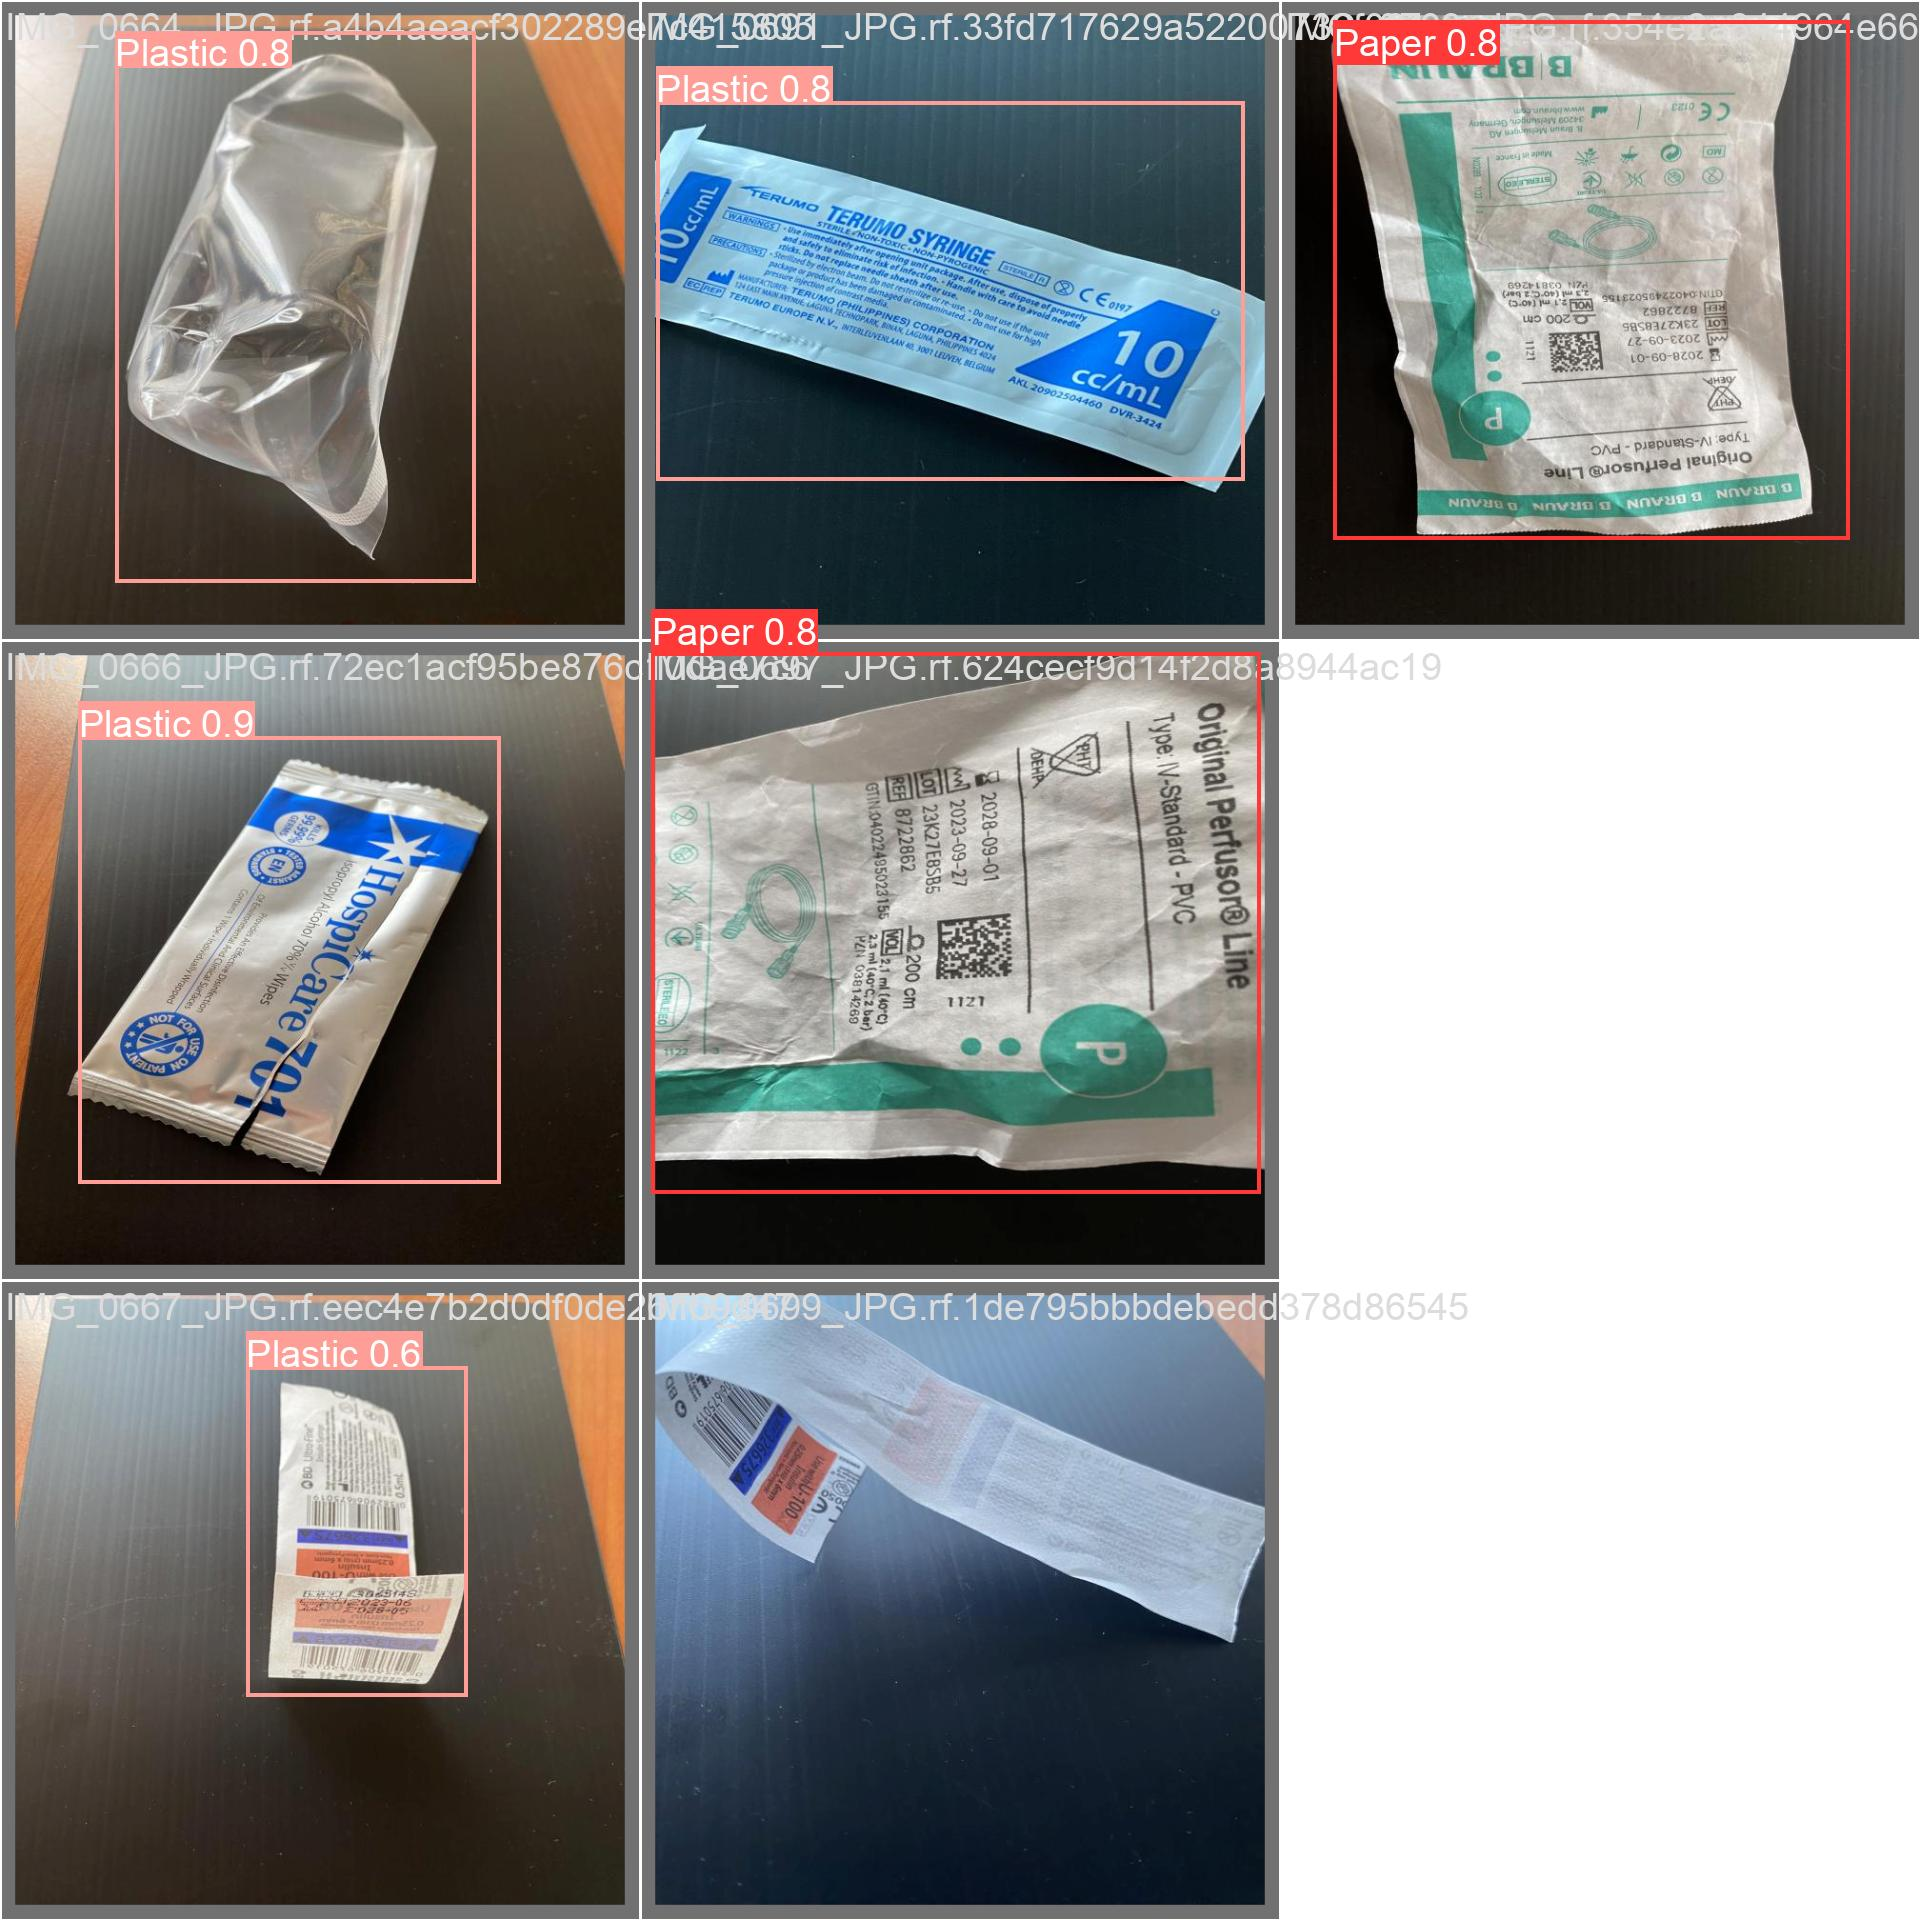

In [22]:
Image(f'runs/train/{exp}/val_batch0_pred.jpg', width=700)

In [23]:
# Run evaluation
!python detect.py --weights runs/train/exp12/weights/best.pt --conf 0.1 --source hop-tiny-4/test/images

detect: weights=['runs/train/exp12/weights/best.pt'], source=hop-tiny-4/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-284-g95ebf68f Python-3.10.12 torch-2.2.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3060, 12039MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/4 /home/invigilo/evan/hooper/cv/yolov5/hop-tiny-4/test/images/IMG_0665_JPG.rf.3bbac9ffbb80dd2f3a4bc934c70c7260.jpg: 640x640 1 Plastic, 4.3ms
image 2/4 /home/invigilo/evan/hooper/cv/yolov5/hop-tiny-4/test/images/IMG_0681_JPG.rf.4f424eec2400d62d419495c9e50bff0c.jpg: 640x640 1 Plastic, 4.2ms
image 3/4 /h

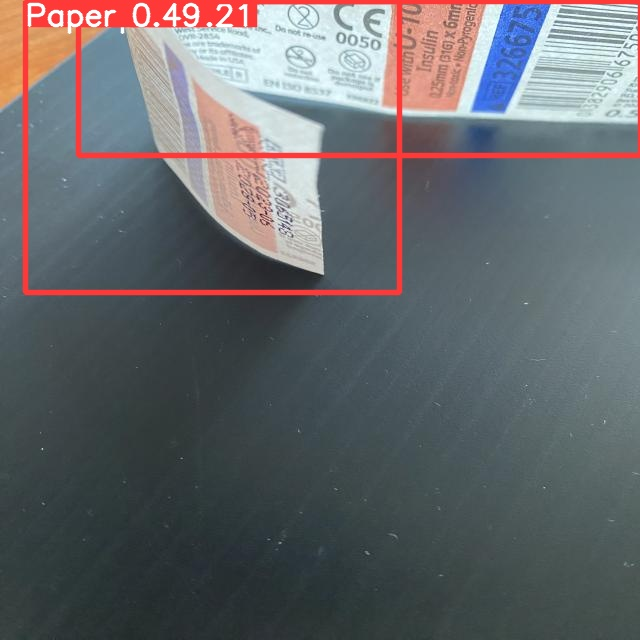

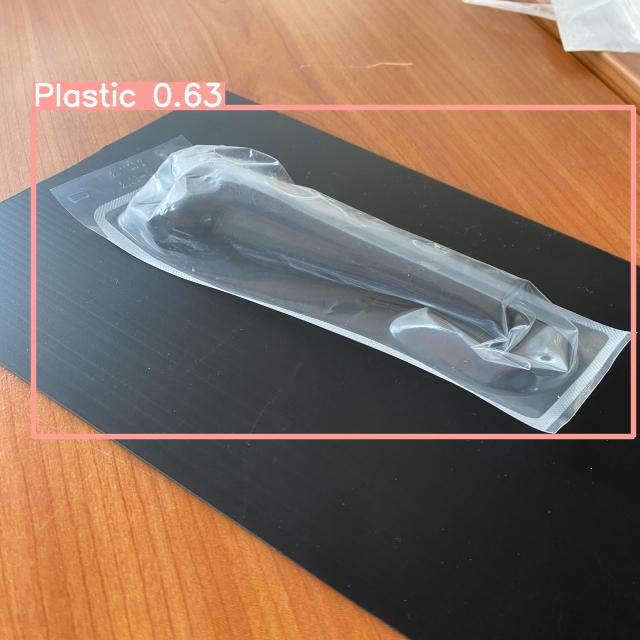

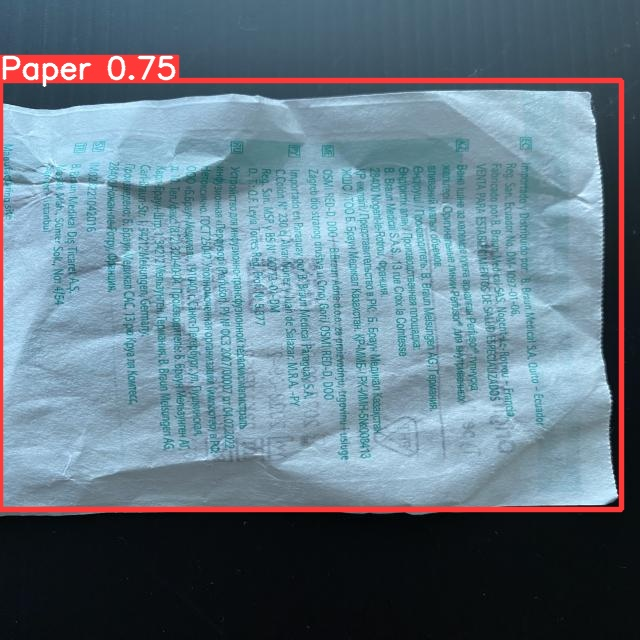

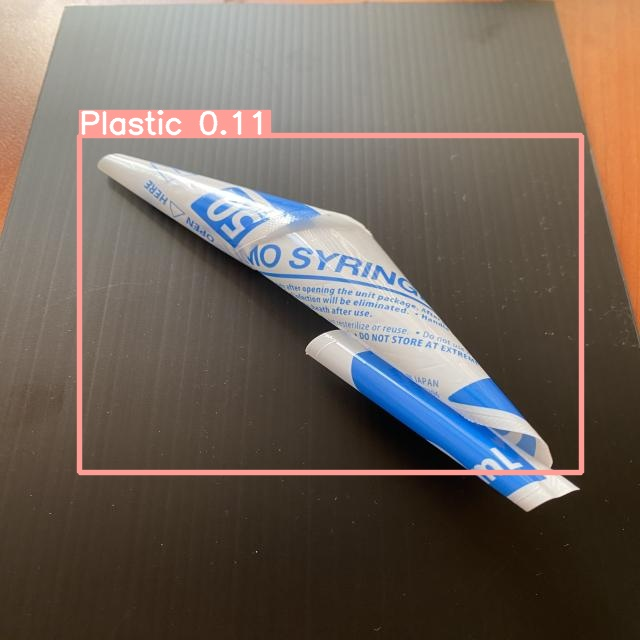

In [24]:
import glob
from IPython.display import Image, display

for imageName in glob.glob(f'runs/detect/{exp}/*.jpg')[:10]: #assuming JPG
    display(Image(filename=imageName))

## Deploy Model on Roboflow

Once you have finished training your YOLOv5 model, you’ll have a set of trained weights ready for use. These weights will be in the `/content/yolov5/runs/train/` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.


In [25]:
from roboflow import Roboflow
rf = Roboflow(api_key="rz0A8V6lWKzJHGDrFe89")
project = rf.workspace("healthhack").project("hop-tiny")
dataset = project.version(4)

project.version(dataset.version).deploy(model_type="yolov5", model_path=f"runs/train/{exp}")

loading Roboflow workspace...
loading Roboflow project...
View the status of your deployment at: https://app.roboflow.com/healthhack/hop-tiny/4
Share your model with the world at: https://universe.roboflow.com/healthhack/hop-tiny/model/4
